# 3.5 pandas可视化

### pandas库中集成了matplotlib中的基础组件，让绘图更加简单。

## 3.5.1 线形图

### 线形图通常用于描绘两组数据之间的趋势。例如，销售行中月份与销售量之间的趋势情况；金融行中股票收盘价与时间序列之间的走势。

### pandas库中的Series和DataFrame中都有绘制各类图表的plot方法，默认情况绘制的是线形图。

In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
s = Series(np.random.normal(size=10))
s

0    0.606107
1   -1.457629
2   -1.780671
3   -2.281905
4    0.948218
5   -0.284132
6   -1.517663
7    0.240700
8   -0.137335
9   -0.027862
dtype: float64

#### 注意：%matplotlib inline为魔法函数，使用该函数绘制的图片会直接显示在Notebook中。

### 通过s.plot方法可以绘制线形图，Series的索引作为X轴，值为Y轴。

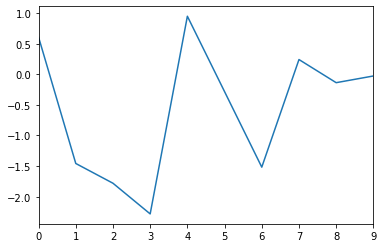

In [3]:
s.plot()

### 通过DataFrame数据的plot方法可以为各列绘制一条线，并会给其创建好图例。

In [19]:
df = DataFrame({'normal':np.random.normal(size=100),
               'gamma':np.random.gamma(1,size=100),
               'poisson':np.random.poisson(size=100)})
df.cumsum()

,normal,gamma,poisson
0,-0.352547,0.073979,1.0
1,1.249704,0.415538,2.0
2,1.794386,2.619764,2.0
3,1.700509,4.546015,3.0
4,1.575589,5.356120,3.0
...,...,...,...
95,7.472019,95.004998,97.0
96,6.287801,96.269555,97.0
97,7.344542,97.175120,97.0
98,8.446496,102.120759,97.0


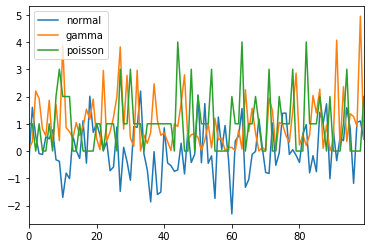

In [22]:
df.plot()

## 3.5.2 柱状图

### 柱状图常描绘各类别之间的关系。例如，班级中男生和女生的分布情况；某零售店各商品的购买数量分布情况。通过pandas绘制柱状图很简单，只需要在plot函数中加入kind=‘bar'，如果类别较多，可绘制水平柱状图（kind=‘barh'）。

In [23]:
data = {
    'name':['张三','李四','王五','小明'],
    'sex':['female','female','male','male'],
    'year':[2001,2001,2003,2002],
    'city':['北京','上海','广州','北京']
}
df = DataFrame(data)
df

,name,sex,year,city
0,张三,female,2001,北京
1,李四,female,2001,上海
2,王五,male,2003,广州
3,小明,male,2002,北京


In [24]:
df['sex'].value_counts()

female    2
male      2
Name: sex, dtype: int64

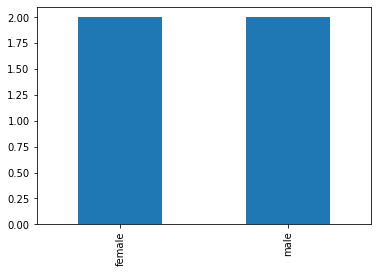

In [25]:
df['sex'].value_counts().plot(kind='bar')

### 对于DataFrame数据而言，每一行的值会成为一组

In [15]:
df2 = DataFrame(np.random.randint(0,100,size=(3,3)),
               index=('one','two','three'),
               columns=['A','B','C'])
df2

,A,B,C
one,90,73,33
two,23,45,14
three,6,24,58


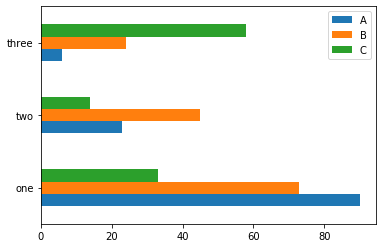

In [16]:
df2.plot(kind='barh')

### 说明：可视化效果会用不同的颜色来代表不同的类

### 设置plot函数的stacked参数，可以绘制堆积柱状图

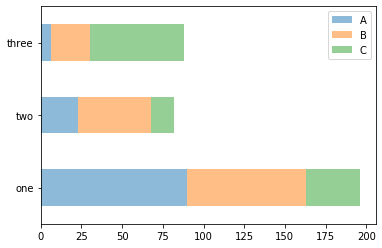

In [28]:
df2.plot(kind='barh',stacked=True,alpha=0.5)

### 说明：plot函数的alpha参数可设置颜色透明度。

## 3.5.3 直方图和密度图

### 直方图用于频率分布，y轴可为数值或者比率。直方图在统计分析中是经常使用的，绘制数据的直方图，可以看出其大概分布规律。例如，某班级的身高情况一般是服从正态分布，即高个子和矮个子的人较少，大部分都是在平均身高左右。

### 可以通过hist方法绘制直方图

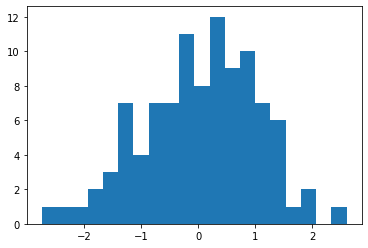

In [30]:
s = Series(np.random.normal(size=100))
s.hist(bins=20,grid=False)

#### 注意：通过设置grid参数可在图表中添加网格；bins参数是将值分为多少段，默认为10。

### 核密度估计（Kernel Density Estimate, KDE）是对真实密度的估计，其过程是将数据的分布近似为一组核（如正态分布）。通过plot函数的kind='kde’可进行绘制

C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Administrator\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


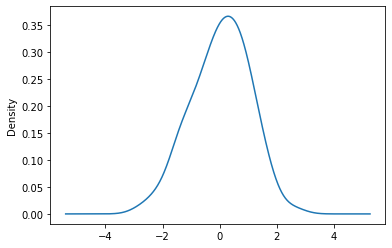

In [31]:
s.plot(kind='kde')

## 3.5.4 散点图

### 散点图主要用来表现数据之间的规律。例如，身高和体重之间的规律。下面创建一个DataFrame数据，然后绘制散点图

In [32]:
df3 = DataFrame(np.arange(10),columns=['X'])
df3['Y'] = 2*df3['X']+5
df3

,X,Y
0,0,5
1,1,7
2,2,9
3,3,11
4,4,13
5,5,15
6,6,17
7,7,19
8,8,21
9,9,23


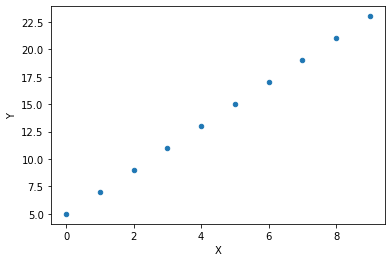

In [33]:
df3.plot(kind='scatter',x='X',y='Y')